# Caution 

1) If reaction names and specie names (or maybe Id) are same for two reaction, they are combined. Remember to change the reaction name before combining models if you want same reactions to be present (even for different compartments).

2) Do not change the membrane model and the external subsystem model. The ones that I have listed should be there. Add new models in the respective ListOfSubsystems according to mechanism you want to achieve.

3) Change internal subsystem of cells (cell_2 and cell_3) to be fused according to the objective you want to achieve. 

4) Remeber to check the sbml file of generated model to verify if things are correct.

5) I am printing result 1 and 2 inorder to check if fusion occur at right time, specie concentration are set correctly



# Model for violacein pathway

In [39]:
from biocrnpyler import *
import numpy as np
import pylab as plt
from subsbml import *
import libsbml
import bokeh.io
import bokeh.plotting
bokeh.io.output_notebook()

Loading BokehJS ...

# Make individual cell model

In [78]:
ss1 = createSubsystem('Models/Export_transporter_cell1.xml')
ss2 = createSubsystem('Models/atc_external_reservoir.xml')
#ssext= createSubsystem('Models/dnaStrand_fusion_export.xml')

# Create a simple atc membrane where atc goes in an out of the membrane via a reversible reaction
mb1 = createSubsystem('Models/atc_membrane_export.xml', membrane = True)

mb2 = createSubsystem('Models/dnaexp_membrane1.xml', membrane = True)

cell_1 =  System('cell_1',ListOfInternalSubsystems = [ss1],
                 ListOfExternalSubsystems = [ss2],
                 ListOfMembraneSubsystems = [mb1,mb2])

cell_1_model = cell_1.getModel()
cell_1_model.renameCompartments('cell_1_external', 'cell_external')
cell_1_model.getSBMLDocument().getModel().getCompartment(1).setSize(1e-4) 
#cell_1_model.getSBMLDocument().getModel().getCompartment(0).setSize(1e-10) 
cell_1_model.setSpeciesConcentration('atc_e', 1e4, compartment = 'cell_external')
cell_1_model.setSpeciesConcentration('ssDNA', 50, compartment = 'cell_1_internal')
cell_1_model.setSpeciesConcentration('dna_g', 1, compartment = 'cell_1_internal')
cell_1_model.setSpeciesConcentration('tetR', 10, compartment = 'cell_1_internal')
cell_1_model.setSpeciesConcentration('ATP', 15, compartment = 'cell_1_internal')


cell_1_model.writeSBML('Models/m2Dnaexp_cell.xml')

The subsystem from Models/atc_membrane_export.xml has multiple compartments
The subsystem from Models/dnaexp_membrane1.xml has multiple compartments


1

In [79]:
ss3 = createSubsystem('Models/liposome_1.xml')
mb3 = createSubsystem('Models/atc_membrane_cell2.xml', membrane = True)
cell_2 =  System('cell_2',ListOfInternalSubsystems = [ss3],
                 ListOfExternalSubsystems = [ss2],
                 ListOfMembraneSubsystems = [mb3])

cell_2_model = cell_2.getModel()
#cell_2_model.renameSName('atc_i', 'atc_i_cell2')
cell_2_model.renameCompartments('cell_2_external', 'cell_external')
cell_2_model.getSBMLDocument().getModel().getCompartment(0).setSize(1e-4) 
#cell_2_model.getSBMLDocument().getModel().getCompartment(1).setSize(1e-10) 

cell_2_model.setSpeciesConcentration('atc_e', 1e4, compartment = 'cell_external')
cell_2_model.setSpeciesConcentration('ssDNA_comp1', 10, compartment = 'cell_2_internal')
cell_2_model.setSpeciesConcentration('TRP', 10, compartment = 'cell_2_internal')
cell_2_model.setSpeciesConcentration('dna_dna_vioA', 10, compartment = 'cell_2_internal')
cell_2_model.setSpeciesConcentration('dna_dna_vioB', 10, compartment = 'cell_2_internal')
cell_2_model.setSpeciesConcentration('dna_dna_vioE', 10, compartment = 'cell_2_internal')
cell_2_model.setSpeciesConcentration('dna_dna_vioD', 10, compartment = 'cell_2_internal')

cell_2_model.writeSBML('Models/m2fusion_cell1.xml')

The subsystem from Models/atc_membrane_cell2.xml has multiple compartments


1

In [80]:
ss5 = createSubsystem('Models/liposome_2.xml')
mb4 = createSubsystem('Models/atc_membrane_cell3.xml', membrane = True)
cell_3 =  System('cell_3',ListOfInternalSubsystems = [ss5],
                 ListOfExternalSubsystems = [ss2],
                 ListOfMembraneSubsystems = [mb4])

cell_3_model = cell_3.getModel()

cell_3_model.renameCompartments('cell_3_external', 'cell_external')
cell_3_model.getSBMLDocument().getModel().getCompartment(0).setSize(1e-4) 
#cell_3_model.getSBMLDocument().getModel().getCompartment(1).setSize(1e-10) 

cell_3_model.setSpeciesConcentration('atc_e', 1e4, compartment = 'cell_external')
cell_3_model.setSpeciesConcentration('ssDNA_comp2', 10, compartment = 'cell_3_internal')
cell_3_model.setSpeciesConcentration('dna_dna_vioC', 10, compartment = 'cell_3_internal')

cell_3_model.writeSBML('Models/m2fusion_cell2.xml')


The subsystem from Models/atc_membrane_cell3.xml has multiple compartments


1

In [81]:
system2 = createNewSubsystem() 
system2.combineSubsystems([cell_1_model, cell_2_model, cell_3_model], verbose=True)
system2.writeSBML('Models/m2system2.xml')
combmod2=system2.getSBMLDocument().getModel()
combinemodel2=SimpleModel(combmod2)
combinemodel2.createNewSpecies(ListOfSpecies = ['dsDNA'],sComp = 'cell_external_combined', ListOfAmounts = [0], 
                             sConstant = False)
combinemodel2.createNewParameter(ListOfParameters = ['kf','kre'],
                               ListOfValues = [100, 1e-7],
                               pConstant = False, pUnit = 'per_second')
combinemodel2.createSimpleReaction(rId = 'raa1',rStr = 'ssDNA_comp1 + ssDNA_comp2 + ssDNA_e <-> dsDNA',
                                 rRate = 'kf * ssDNA_comp1 * ssDNA_comp2 * ssDNA_e - kre * dsDNA',
                                 isConstant = False)

system2.writeSBML('Models/m3system32.xml')


C:\Users\Agrima\anaconda3\lib\site-packages\subsbml-0.1-py3.7.egg\subsbml\Subsystem.py:646: UserWarning: Not all of the Subsystems being combined are in the same Compartment
C:\Users\Agrima\anaconda3\lib\site-packages\subsbml-0.1-py3.7.egg\subsbml\Subsystem.py:989: UserWarning: Annotated propensity updated to: <PropensityType> type=massaction k=0.0002  </PropensityType>
C:\Users\Agrima\anaconda3\lib\site-packages\subsbml-0.1-py3.7.egg\subsbml\Subsystem.py:989: UserWarning: Annotated propensity updated to: <PropensityType> type=massaction k=2e-09  </PropensityType>
C:\Users\Agrima\anaconda3\lib\site-packages\subsbml-0.1-py3.7.egg\subsbml\Subsystem.py:989: UserWarning: Annotated propensity updated to: <PropensityType> type=massaction k=4e-05  </PropensityType>
C:\Users\Agrima\anaconda3\lib\site-packages\subsbml-0.1-py3.7.egg\subsbml\Subsystem.py:989: UserWarning: Annotated propensity updated to: <PropensityType> type=massaction k=1e-12  </PropensityType>
C:\Users\Agrima\anaconda3\lib\sit

1

In [82]:
system2.setSpeciesConcentration('atc_e', 1e4, compartment = 'cell_external')
system2.setSpeciesConcentration('ssDNA', 50, compartment = 'cell_1_internal')
system2.setSpeciesConcentration('dna_g', 1, compartment = 'cell_1_internal')
system2.setSpeciesConcentration('tetR', 10, compartment = 'cell_1_internal')
system2.setSpeciesConcentration('ATP', 15, compartment = 'cell_1_internal')
system2.setSpeciesConcentration('ssDNA_comp1', 10, compartment = 'cell_2_internal')
system2.setSpeciesConcentration('ssDNA_comp2', 10, compartment = 'cell_3_internal')
system2.writeSBML('Models/m3system32.xml')

1

C:\Users\Agrima\anaconda3\lib\site-packages\bioscrape\sbmlutil.py:93: UserWarning: SBML model contains reversible reaction!
Please check rate expressions and ensure they are non-negative before doing stochastic simulations.
  'Please check rate expressions and ensure they are non-negative before doing '+
C:\Users\Agrima\anaconda3\lib\site-packages\bioscrape\sbmlutil.py:208: UserWarning: Compartments, UnitDefintions, Events, and some other SBML model components are not recognized by bioscrape. Refer to the bioscrape wiki for more information.
  warnings.warn('Compartments, UnitDefintions, Events, and some other SBML model components are not recognized by bioscrape. ' +


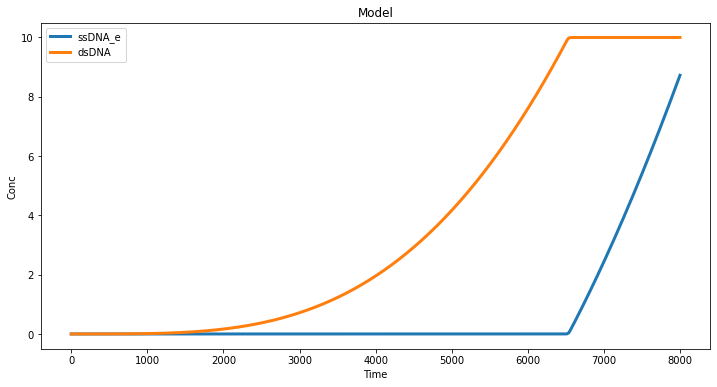

In [83]:
timepoints = np.linspace(0,8000,400)
result1, _ = system2.simulateWithBioscrape(timepoints)
ssDNA_e_id1 = system2.getSpeciesByName('ssDNA_e', compartment = 'cell_external').getId()
dsDNA_id2 =system2.getSpeciesByName('dsDNA').getId()
vire2b_id2 =system2.getSpeciesByName('VirE2_b').getId()
plt.figure(figsize=(12,6))
plt.plot(timepoints, result1[ssDNA_e_id1], linewidth = 3, label = 'ssDNA_e')
plt.plot(timepoints, result1[dsDNA_id2], linewidth = 3, label = 'dsDNA')
plt.title("Model")
plt.xlabel('Time')
plt.ylabel('Conc')
plt.legend()
plt.show()

In [84]:
%run myfusion.py

In [85]:
fused_cell,r1,t1,r2,t2= triggeredFusion ( [system2], [cell_2_model, cell_3_model], "dsDNA", ">", .05, timepoints, mxstep=5)

C:\Users\Agrima\anaconda3\lib\site-packages\bioscrape\sbmlutil.py:93: UserWarning: SBML model contains reversible reaction!
Please check rate expressions and ensure they are non-negative before doing stochastic simulations.
  'Please check rate expressions and ensure they are non-negative before doing '+
C:\Users\Agrima\anaconda3\lib\site-packages\bioscrape\sbmlutil.py:208: UserWarning: Compartments, UnitDefintions, Events, and some other SBML model components are not recognized by bioscrape. Refer to the bioscrape wiki for more information.
  warnings.warn('Compartments, UnitDefintions, Events, and some other SBML model components are not recognized by bioscrape. ' +


In [86]:
print(r1)
r1.to_csv('file1.csv') 

    atc_e_external_reservoir_model_1_combined  atc_i_cell2  ssDNA_comp1  \
0                                10000.000000     0.000000         10.0   
1                                 9606.970382   393.029618         10.0   
2                                 9229.465228   770.534772         10.0   
3                                 8866.871330  1133.128670         10.0   
4                                 8518.599701  1481.400299         10.0   
..                                        ...          ...          ...   
69                                 666.585839  9333.414161         10.0   
70                                 642.221195  9357.778805         10.0   
71                                 618.818942  9381.181058         10.0   
72                                 596.341071  9403.658929         10.0   
73                                 574.751059  9425.248941         10.0   

    enzyme_VioA_biocrnpyler_624668  \
0                         0.000000   
1                      

In [87]:
r2
r2.to_csv('file2.csv') 

In [88]:
trp_id2 = cell_2_model.getSpeciesByName('TRP').getId()
IPA_imine_id2 = cell_2_model.getSpeciesByName('IPA_imine').getId()
IPA_imine_dimer_id2 = cell_2_model.getSpeciesByName('IPA_imine_dimer').getId()
PTDVA_id2 = cell_2_model.getSpeciesByName('PTDVA', compartment = 'fusedcell_internal').getId()
PTVA_id2 = cell_2_model.getSpeciesByName('PTVA', compartment = 'fusedcell_internal').getId()
V_id3 = cell_3_model.getSpeciesByName('V', compartment = 'fusedcell_internal').getId()
DV_id3 = cell_3_model.getSpeciesByName('DV', compartment = 'fusedcell_internal').getId()

trp_id4 = fused_cell.getSpeciesByName('TRP').getId()
IPA_imine_id4 = fused_cell.getSpeciesByName('IPA_imine').getId()
IPA_imine_dimer_id4 = fused_cell.getSpeciesByName('IPA_imine_dimer').getId()
PTDVA_id4 = fused_cell.getSpeciesByName('PTDVA', compartment = 'fusedcell_internal').getId()
PTVA_id4 = fused_cell.getSpeciesByName('PTVA', compartment = 'fusedcell_internal').getId()
V_id4 = fused_cell.getSpeciesByName('V', compartment = 'fusedcell_internal').getId()
DV_id4 = fused_cell.getSpeciesByName('DV', compartment = 'fusedcell_internal').getId()

dsDNA_id2 =system2.getSpeciesByName('dsDNA').getId()
vire2b_id2 =system2.getSpeciesByName('VirE2_b').getId()

In [98]:

fused_plot = bokeh.plotting.figure(width = 800, height = 450, 
                         x_axis_label = 'time(sec)',
                         y_axis_label = 'concentration',
                         title = 'Export_Fusion_Violacein Plot')
#used_plot.line(t1, r1[trp_id2], color = "magenta", line_width = 3, legend_label = 'TRP_cell2')
fused_plot.line(t1, r1[IPA_imine_id2], color = "cyan",line_width = 3, legend_label = 'IPA_imine_cell2')
fused_plot.line(t1, r1[IPA_imine_dimer_id2], color = "green",line_width = 3, legend_label = 'IPA_imine_dimer_cell2')
fused_plot.line(t1, r1[PTDVA_id2], color = "magenta", line_width = 3, legend_label = 'PTDVA_cell2')
#used_plot.line(t1, r1[PTVA_id2], color = "teal",line_width = 3, legend_label = 'PTVA_cell2')
fused_plot.line(t1, r1[V_id3], color = "lime",line_width = 3, legend_label = 'V_cell3')
fused_plot.line(t1, r1[DV_id3], color = "orange",line_width = 3, legend_label = 'DV_cell3')

fused_plot.line(t2, r2[trp_id4], color = "red", line_width = 3,legend_label = 'TRP_fusedcell')
fused_plot.line(t2, r2[IPA_imine_id4], color = "blue", line_width = 3,legend_label = 'IPA_imine_fusedcell')
fused_plot.line(t2, r2[IPA_imine_dimer_id4], color = "grey", line_width = 3,legend_label = 'IPA_imine_dimer_fusedcell')
fused_plot.line(t2, r2[PTDVA_id4], color = "black", line_width = 3,legend_label = 'PTDVA_fusedcell')
fused_plot.line(t2, r2[PTVA_id4], color = "pink", line_width = 3,legend_label = 'PTDA_fusedcell')
#used_plot.line(t2, r2[V_id4], color = "brown", line_width = 3,legend_label = 'V_fusedcell')
#used_plot.line(t2, r2[DV_id4], color = "yellow", line_width = 3,legend_label = 'DV_fusedcell')

#used_plot.line(timepoints, result1[ssDNA_e_id1], color = "brown", line_width = 3,legend_label = 'exported_DNA')
#used_plot.line(timepoints, result1[dsDNA_id2], color = "orange", line_width = 3,legend_label = 'dsDNA')

fused_plot.legend.location = 'top_right'
fused_plot.legend.click_policy="hide"

bokeh.io.show(fused_plot)